# Homework: Notebooks to Illustrator

In this notebook you'll be building basic graphics which you'll then export to Illustrator and clean up. Overall I'll be looking at **your attention to detail** when accurately reproducing the graphics.

# Homework tips

## How to do this homework

**Start in pandas, [Altair](https://altair-viz.github.io/) or ggplot,** export to PDF or SVG, then move on over to Illustrator. 
- To [save in Altair](https://altair-viz.github.io/user_guide/saving_charts.html#png-svg-and-pdf-format), you'll need to install the `vl-convert-python` package
- If you're using ggplot, I recommend saving to PDF instead of SVG when using `ggsave`

**Do these in whatever order you'd like.** Feel free to do a bar graph, then skip ahead to some line graphs, etc.

**You choose when to leave the notebook.** I personally do the majority of my work in Illustrator, so as soon as I have all the bars and text I need I'm exporting and am on my way. But some folks might want to tweak axes, colors and alignment before exporting.

If the coding is too tough, don't worry! Just use DataWrapper and on the **Publish & Embed** step choose to export as PDF under **Export or duplicate visualization**.

While ChatGPT is great for tweaks before you head out to Illustrator, **remember how it can prevent you from *actually learning how to do things*.** You should always start from the [Altair examples page](https://altair-viz.github.io/), [python-graph-gallery](https://python-graph-gallery.com/), [r-graph-gallery](https://r-graph-gallery.com/), or [ggplot flipbook](https://evamaerey.github.io/ggplot_flipbook/ggplot_flipbook_xaringan.html). ChatGPT is most useful for things like formatting numbers on axes.

## Illustrator tips

Illustrator guides and videos are available in the homework assignment itself. The tips below are just a quick reference.

### Opening things in Illustrator

Select everything (Command+A) then `Object > Clipping Mask > Release` (Command + Option + 7) again and again and again until it doesn't work any more. Also do the same thing with `Object > Ungroup` (Command + Option + G).

### Fill vs. stroke colors

Fill is the inside, stroke is the outline.

![](images/fill-stroke.png)

You select them separately. The white-with-a-red-line color means no color.

### Background colors

In Illustrator, draw a square as big as your entire artboard, then do `Select > Arrange > Send to Back` to make it go behind everything else.

### Editing lines

`Window > Stroke` to open up the stroke menu, then you can change the size with "Weight" or make it dashed with "Dashed line" (you might need to click the little... thing in the upper right-hand corner of the Stroke window and pick 'Show options' to be able to see that)

![](images/stroke-stuff.png)

### Selecting multiple things in Illustrator

Hold shift, click multiple things. Or click and drag a box around them.

### Selecting all of the _____

Things that look like what you have selected: `Select > Same > Appearance` or `Fill Color` or `Stroke Color` or whatever

Text: `Select > Object > All Text Objects`

### My grid/axis lines are on top of my chart!

Select the line, then `Object > Arrange > Send to Back`

### I sent something to the back and it disappeared!!!

Maybe you have a white rectangle as a background? Try clicking the background and hitting delete.

### Rotating text or other things

Click it (black arrow), then move your mouse around its edge until you see a thing that kind of implies you can rotate it. Click and drag.

### Drawing straight lines or rotating nicely

Hold shift while you draw the line or rotate or move a thing and it will go straight.

### Lining up things

When you have multiple things selected, the `Align` bar becomes active at the top. You can... align things with other things using it instead of manually pushing things around. You might want to play around with the different "Align to..." options.

![](images/align.png)

The "key object" one can be pretty good, as it uses the "key object" as an anchor and moves everything around it. You select the key object by clicking (without holding shift) after you've made your selection. Key object = blue box.

In [62]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [63]:
%%R

require('tidyverse')

In [64]:
%%R
require('tidycensus')
require('tidyverse')

In [65]:
%%R
require('svglite')

## 1990s

In [66]:
df = pd.read_csv('1990sname.csv')
df.drop('Unnamed: 3', axis=1, inplace=True)
df.number = df.number.str.replace(',', '').astype(int)
df

,name,number,gender
0,Michael,462390,male
1,Christopher,360255,male
2,Matthew,351649,male
3,Joshua,329157,male
4,Jacob,298400,male
5,Nicholas,275309,male
6,Andrew,272909,male
7,Daniel,272315,male
8,Tyler,262296,male
9,Joseph,260709,male


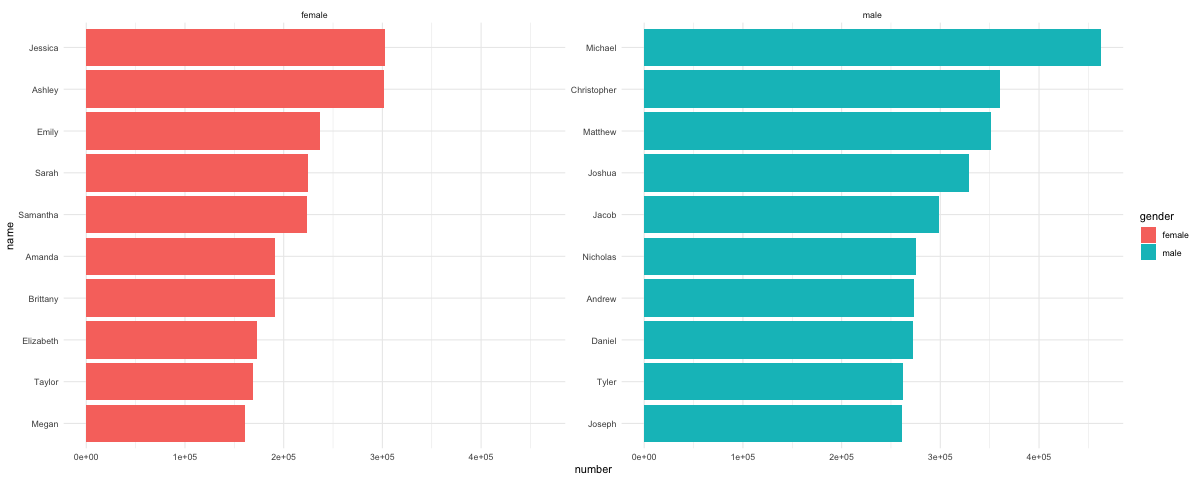

In [67]:
%%R -i df -w 1200

#use ggplot to plot the data into slpitted bar chart
df$name <- factor(df$name, levels = df$name[order(df$number)])

plot <- ggplot(df) +
  aes(x= name, y= number, fill = gender) +
  geom_bar(stat = "identity") +
  coord_flip() +
  facet_wrap(~gender, scales = "free_y") +
  theme_minimal() 
print(plot)

#save the plot into pdf
ggsave("1990sname.pdf", width = 12, height = 8)

## 2000s

In [68]:
df = pd.read_csv('2000sname.csv')
df.number = df.number.str.replace(',', '').astype(int)
df

,name,number,gender
0,Jacob,273992,male
1,Michael,250662,male
2,Joshua,232004,male
3,Matthew,221591,male
4,Daniel,203881,male
5,Christopher,203351,male
6,Andrew,202541,male
7,Ethan,201809,male
8,Joseph,194863,male
9,William,194368,male


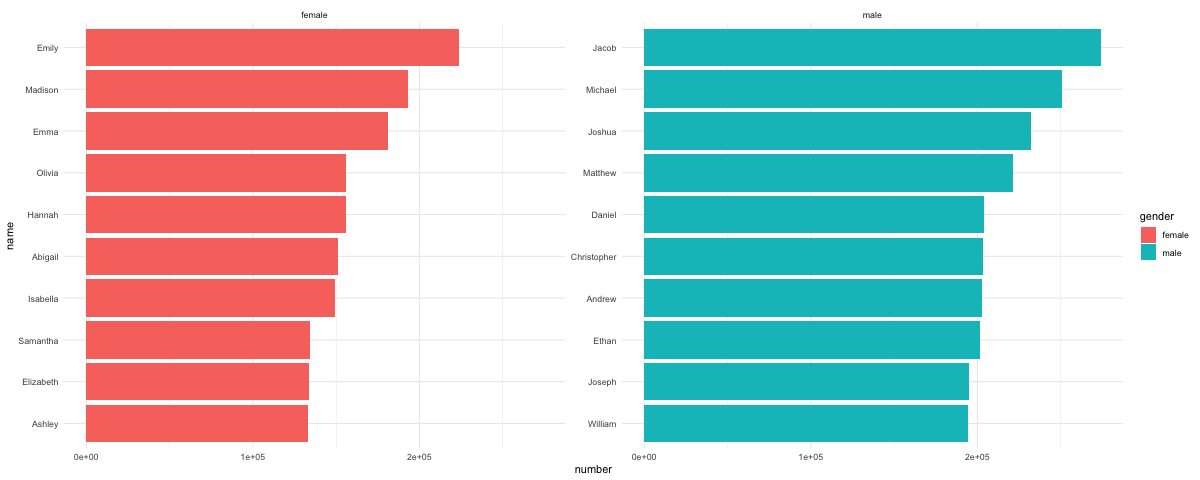

In [69]:
%%R -i df -w 1200

#use ggplot to plot the data into slpitted bar chart
df$name <- factor(df$name, levels = df$name[order(df$number)])

plot <- ggplot(df) +
  aes(x= name, y= number, fill = gender) +
  geom_bar(stat = "identity",position = position_dodge(width = 0.5)) +
  coord_flip() +
  facet_wrap(~gender, scales = "free_y") +
  theme_minimal() 
print(plot)


ggsave("2000sname.pdf", width = 12, height = 8)


## 2010s

In [70]:
df = pd.read_csv('2010sname.csv')
df.drop('Unnamed: 3', axis=1, inplace=True)
df.number = df.number.str.replace(',', '').astype(int)
df

,name,number,gender
0,Noah,183172,male
1,Liam,173888,male
2,Jacob,163114,male
3,William,159833,male
4,Mason,157787,male
5,Ethan,149000,male
6,Michael,145020,male
7,Alexander,142043,male
8,James,139564,male
9,Elijah,136937,male


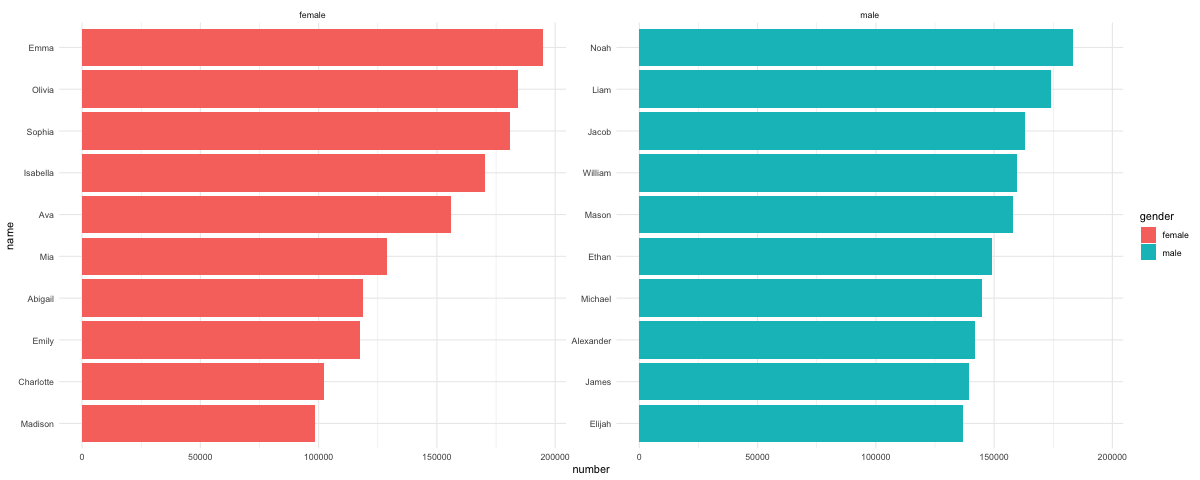

In [71]:
%%R -i df -w 1200

#use ggplot to plot the data into slpitted bar chart
df$name <- factor(df$name, levels = df$name[order(df$number)])

plot <- ggplot(df) +
  aes(x= name, y= number, fill = gender) +
  geom_bar(stat = "identity") +
  coord_flip() +
  facet_wrap(~gender, scales = "free_y") +
  theme_minimal() 
print(plot)

ggsave("2010sname.pdf", width = 12, height = 8)



## Julie Over Decades

In [72]:
df = pd.read_csv('julie_year_rank.csv')
df['Year'] = df['Year'].str.rstrip('s').astype(int)
df

,Year,Rank
0,1950,43
1,1960,18
2,1970,18
3,1980,51
4,1990,125


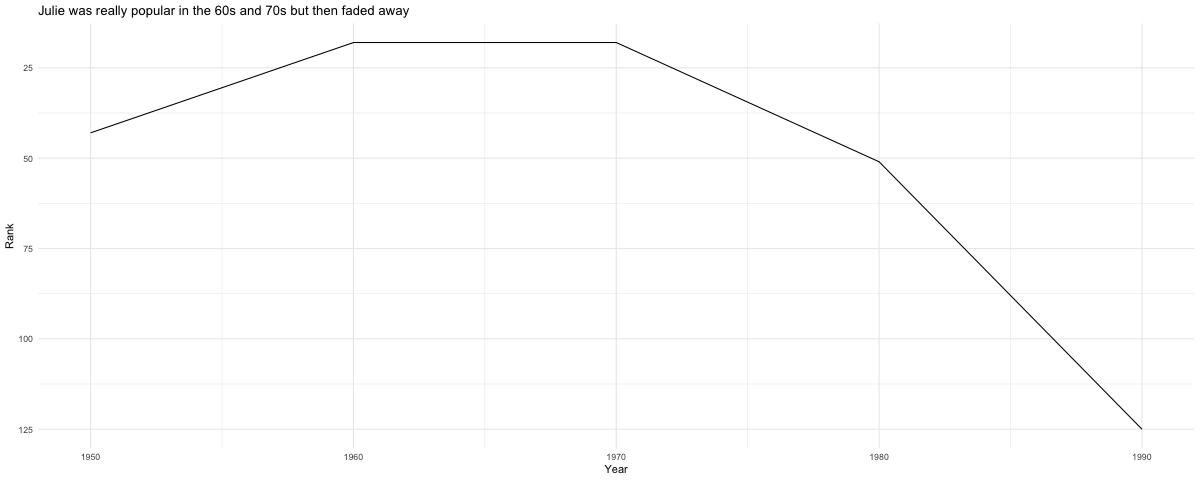

In [74]:
%%R -i df -w 1200


plot <- ggplot(df)+
    aes(x=Year, y=Rank)+
    geom_line()+
    theme_minimal()+
    scale_y_reverse() +
    labs(title="Julie was really popular in the 60s and 70s but then faded away")
print(plot)

ggsave("julie_year_rank.pdf", width = 12, height = 8)

